In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

import sys
sys.path.append("/home/z5297792/UNSW-MRes/MRes/modules") 
from utils import dopioe, extract_transect_center, plot_ellipse

with open('/srv/scratch/z5297792/isolated_water_column_sample_data/frontier_sample_data.pkl', 'rb') as file:
    sample_data = pickle.load(file)
the_frontier_eddies = list(sample_data.keys())

z_r = np.load('/srv/scratch/z5297792/z_r.npy')
z_r = np.transpose(z_r, (1, 2, 0))[150,150,:]

the_frontier_eddies

['Eddy790', 'Eddy110', 'Eddy134', 'Eddy775']

In [6]:
df_data = pd.DataFrame(columns=['Eddy', 'Day', 'xc', 'yc', 'w', 'Q', 'Rc', 'psi0', 'z', 'Depth', 'x1', 'y1', 'x2', 'y2'])
for eddy in [the_frontier_eddies[0]]:
    for day in [0]:
        
        day = f'T{day}'
        
        dic_eddy = sample_data[eddy]
        dic = dic_eddy[day]
        
        U, V, x, y, z = dic['U'], dic['V'], dic['x']/1000, dic['y']/1000, -dic['z']/1000
        X, Y = np.meshgrid(x, y, indexing='ij')
        
        xc_old, yc_old = 0, 0
        flag = 1
        r = 30
        for k in range(U.shape[-1]):
        
            u, v = U[:,:,k], V[:,:,k]
        
            # MOCA
            if flag:
                dic = extract_transect_center(u, v, X, Y, xc_old, yc_old, r)
                x1, y1, u1, v1, xx = dic['x1'], dic['y1'], dic['u1'], dic['v1'], dic['xx']
                x2, y2, u2, v2, yy = dic['x2'], dic['y2'], dic['u2'], dic['v2'], dic['yy']
                
                xc, yc, w, Q, Rc, psi0 = dopioe(x1, y1, u1, v1, x2, y2, u2, v2, Rc_max=20)
                if not np.isnan(xc):
        
                    if np.hypot(xc - xc_old, yc - yc_old) < 50:
                        
                        df_data.loc[len(df_data)] = {
                            'Eddy': eddy, 'Day': int(day[1:]), 
                            'xc': xc, 'yc': yc, 'w': w,
                            'Q': Q, 'Rc': Rc, 'psi0': psi0,
                            'z': k, 'Depth': -z_r[k],
                            'x1': x1, 'y1': y1,
                            'x2': x2, 'y2': y2,
                            }
                        xc_old, yc_old = xc, yc
                    else:
                        flag = 0
                else:
                    flag = 0
df_data.head()


,Eddy,Day,xc,yc,w,Q,Rc,psi0,z,Depth,x1,y1,x2,y2
0,Eddy790,0,7.039284,-1.436945,0.037305,"[[0.010159926753556373, -0.0008458100999928391...",13.114721,-171.802102,0,1.783320,"[-27.0, -24.0, -21.0, -18.0, -15.0, -12.0, -9....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-27.0, -24.0, -21.0, -18.0, -15.0, -12.0, -9...."
1,Eddy790,0,6.245462,0.477727,0.037111,"[[0.010068229912351467, -0.0009121146595432016...",59.285412,3487.461191,1,5.879627,"[-21.0, -18.0, -15.0, -12.0, -9.0, -6.0, -3.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, ...","[-30.0, -27.0, -24.0, -21.0, -18.0, -15.0, -12..."
2,Eddy790,0,5.682722,0.974550,0.036761,"[[0.010030843122652433, -0.0008750568688434405...",18.079976,-326.653569,2,10.725783,"[-21.0, -18.0, -15.0, -12.0, -9.0, -6.0, -3.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, ...","[-27.0, -24.0, -21.0, -18.0, -15.0, -12.0, -9...."
3,Eddy790,0,5.112195,1.246382,0.036590,"[[0.009980813868625838, -0.0008458131563813411...",19.459535,-378.450988,3,16.383097,"[-24.0, -21.0, -18.0, -15.0, -12.0, -9.0, -6.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, ...","[-27.0, -24.0, -21.0, -18.0, -15.0, -12.0, -9...."
4,Eddy790,0,4.469243,1.311564,0.036438,"[[0.009926225297229635, -0.0008302035291427563...",85.515545,7267.126315,4,22.925581,"[-24.0, -21.0, -18.0, -15.0, -12.0, -9.0, -6.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, ...","[-27.0, -24.0, -21.0, -18.0, -15.0, -12.0, -9...."


In [3]:
# fig, axs = plt.subplots(1, 4, sharey=True)
# for e, eddy in enumerate(df_data.Eddy.unique()):
#     df_eddy = df_data[df_data.Eddy==eddy].copy()
#     for day in df_eddy.Day.unique():
#         df = df_eddy[df_eddy.Day==day].copy()
#         axs[e].plot(df.xc, df.Depth/1000)
# axs[0].invert_yaxis()
# plt.tight_layout()


(np.float64(-161.25),
 np.float64(152.25),
 np.float64(-161.25),
 np.float64(152.25))

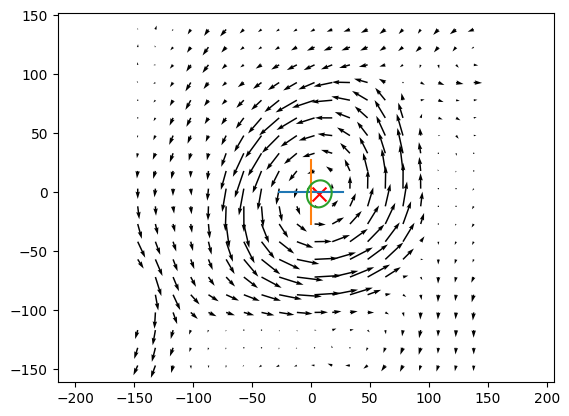

In [14]:
eddy = the_frontier_eddies[0]
day = 0
k = 0

data = df_data[(df_data.Eddy==eddy) & (df_data.Day==day) & (df_data.z==k)].iloc[0]

day = f'T{day}'
dic_eddy = sample_data[eddy]
dic = dic_eddy[day]

U, V, x, y, z = dic['U'], dic['V'], dic['x']/1000, dic['y']/1000, -dic['z']/1000
X, Y = np.meshgrid(x, y, indexing='ij')
u, v = U[:,:,k], V[:,:,k]

spac = 5
plt.quiver(X[::spac, ::spac], Y[::spac, ::spac], u[::spac, ::spac], v[::spac, ::spac],scale=20)
plt.scatter(data.xc, data.yc, marker='x', color='r', s=100)
plt.plot(data.x1, data.y1); plt.plot(data.x2, data.y2)
x_ell, y_ell = plot_ellipse(data.Q, (data.xc, data.yc), scale=data.Rc)
plt.plot(x_ell, y_ell)
plt.axis('equal')